In [15]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


In [17]:
#Importing the dataset for clusterting
dataset = pd.read_csv('democracy_index.csv')

In [19]:
#priting the dataset 
print(dataset)

     Unnamed: 0 rank                           country  democracy_index  \
0             0    1                            Norway             9.87   
1             1    2                           Iceland             9.58   
2             2    3                            Sweden             9.39   
3             3    4                       New Zealand             9.26   
4             4    5                           Denmark             9.22   
..          ...  ...                               ...              ...   
162         162  163                              Chad             1.61   
163         163  164          Central African Republic             1.52   
164         164  165  Democratic Republic of the Congo             1.49   
165         165  166                             Syria             1.43   
166         166  167                       North Korea             1.08   

     electoral_processand_pluralism  functioning_of_government  \
0                             10.

In [21]:
#Priting first 5 dataset of the data.
print((dataset).head)

<bound method NDFrame.head of      Unnamed: 0 rank                           country  democracy_index  \
0             0    1                            Norway             9.87   
1             1    2                           Iceland             9.58   
2             2    3                            Sweden             9.39   
3             3    4                       New Zealand             9.26   
4             4    5                           Denmark             9.22   
..          ...  ...                               ...              ...   
162         162  163                              Chad             1.61   
163         163  164          Central African Republic             1.52   
164         164  165  Democratic Republic of the Congo             1.49   
165         165  166                             Syria             1.43   
166         166  167                       North Korea             1.08   

     electoral_processand_pluralism  functioning_of_government  \
0  

In [23]:
print(dataset.isnull().sum())


Unnamed: 0                        0
rank                              0
country                           0
democracy_index                   0
electoral_processand_pluralism    0
functioning_of_government         0
political_participation           0
political_culture                 0
civil_liberties                   0
category                          0
dtype: int64


In [25]:
# Strip spaces from column names
dataset.columns = dataset.columns.str.strip()

In [27]:
# Define the columns to modify
zero_not_accepted = ['electoral_processand_pluralism', 'functioning_of_government', 'political_participation', 
                     'political_culture', 'civil_liberties']

In [29]:
#Looping through the columns to replace zeros with the mean value
for column in zero_not_accepted:
    # Ensure column exists BY lopoping thorugh
    if column in dataset.columns: 
        dataset[column] = dataset[column].replace(0, np.NaN)
        mean = dataset[column].mean(skipna=True)  
        # Replacing NaNs with mean
        dataset[column] = dataset[column].fillna(mean)  

In [31]:
#Checking if there is empty or missing dataset 
print(dataset.isnull().values.any())


False


In [33]:
X = dataset[zero_not_accepted]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [35]:
zero_not_accepted = ['Electoral Process and Pluralism', 'Functioning of Government',
                     'Political Participation', 'Political Culture', 'Civil Liberties']
print("Before Scaling:\n", X.head())
print("After Scaling:\n", X_scaled[:10])

Before Scaling:
    electoral_processand_pluralism  functioning_of_government  \
0                           10.00                       9.64   
1                           10.00                       9.29   
2                            9.58                       9.64   
3                           10.00                       9.29   
4                           10.00                       9.29   

   political_participation  political_culture  civil_liberties  
0                    10.00              10.00             9.71  
1                     8.89              10.00             9.71  
2                     8.33              10.00             9.41  
3                     8.89               8.13            10.00  
4                     8.33               9.38             9.12  
After Scaling:
 [[1.17521116 1.94774983 2.53899474 2.68165664 1.49407267]
 [1.17521116 1.79969849 1.94570167 2.68165664 1.49407267]
 [1.03122659 1.94774983 1.64638265 2.68165664 1.37830747]
 [1.17521116 1.799

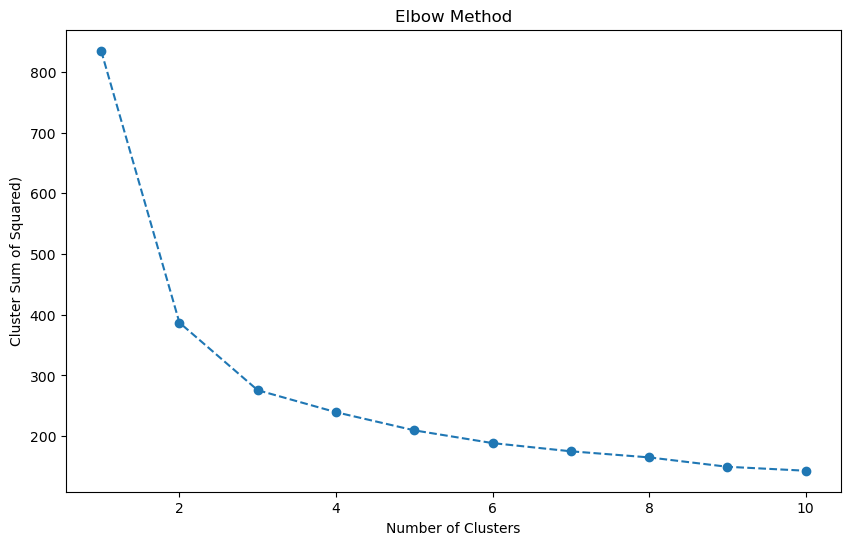

In [37]:
# Determine optimal k using the Elbow Method
css = []
for i in range(1, 11):  # Checking cluster numbers from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    css.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), css, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("Cluster Sum of Squared)")
plt.title("Elbow Method")
plt.show()


In [71]:
# Get cluster-wise averages
cluster_means = dataset.groupby("Cluster")[zero_not_accepted].mean()
print(cluster_means)


KeyError: "Columns not found: 'Functioning of Government', 'Civil Liberties', 'Electoral Process and Pluralism', 'Political Participation', 'Political Culture'"

In [43]:
# Getting K = 4 based on the cluster method after plotting the graph. 
# Define the number of clusters
k = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
dataset['Cluster'] = kmeans.fit_predict(X_scaled)

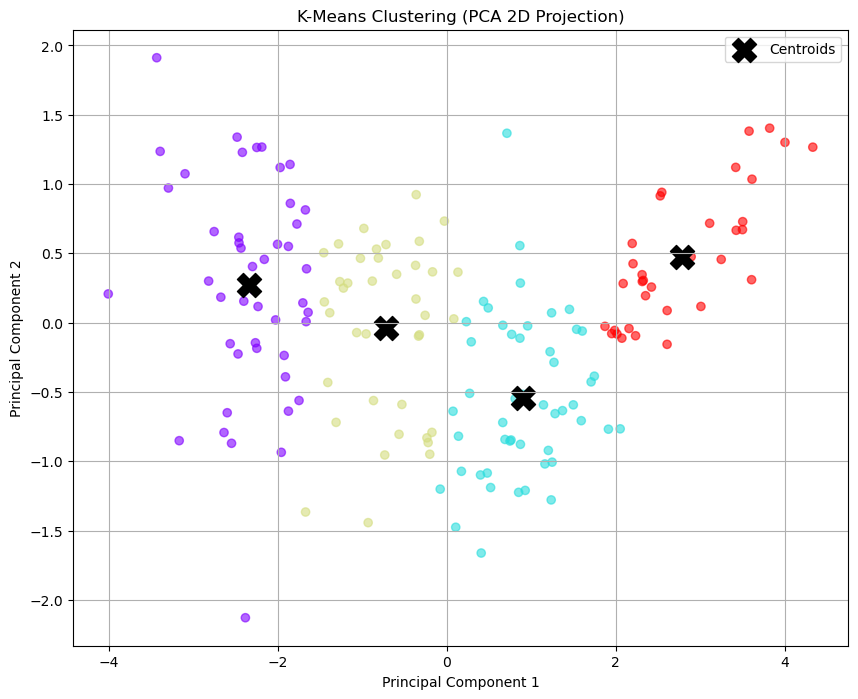

In [45]:
# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means on PCA transformed data
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)  # Use X_pca for clustering

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='rainbow', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', marker='X', label="Centroids")
plt.title("K-Means Clustering (PCA 2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()


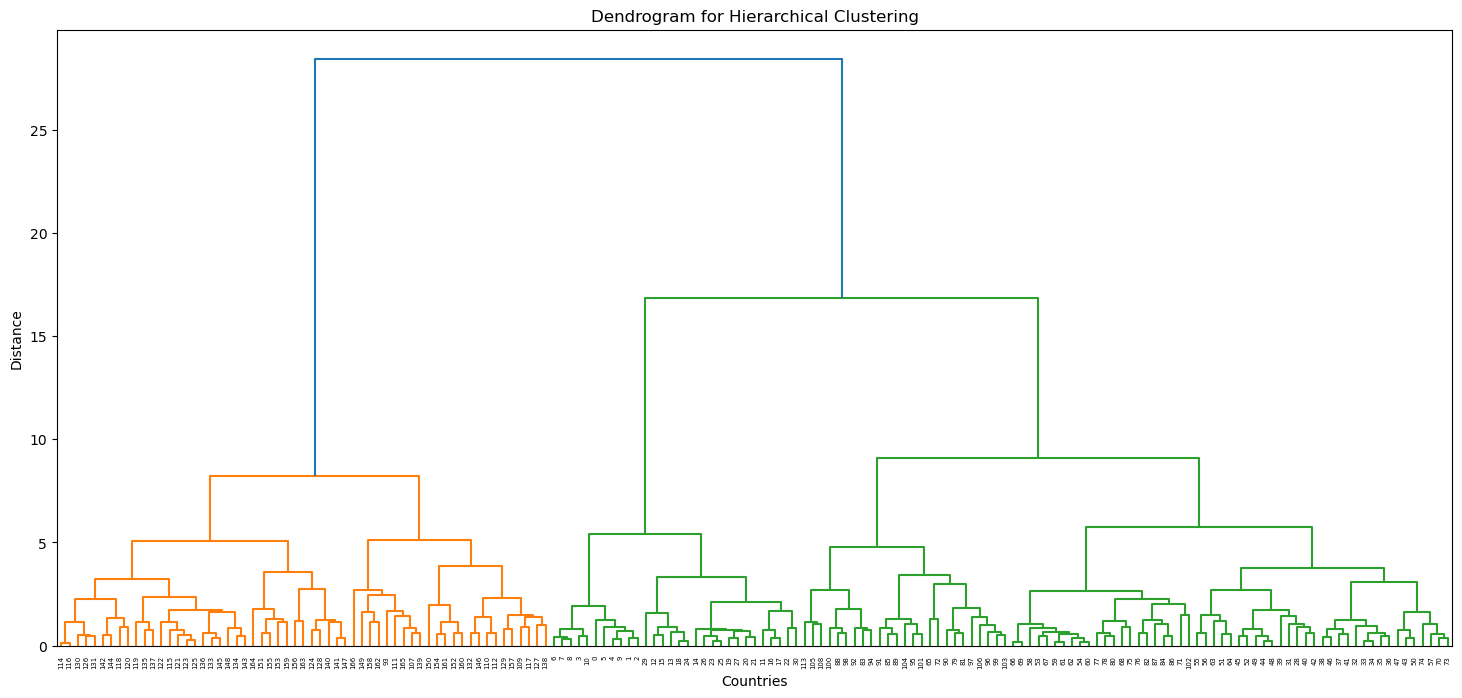

In [85]:
# Plot Dendrogram for Hierarchical Clustering
plt.figure(figsize=(18, 8))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Countries")
plt.ylabel("Distance")
plt.show()

# Apply Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')
dataset['Cluster_Hierarchical'] = hierarchical.fit_predict(X_scaled)


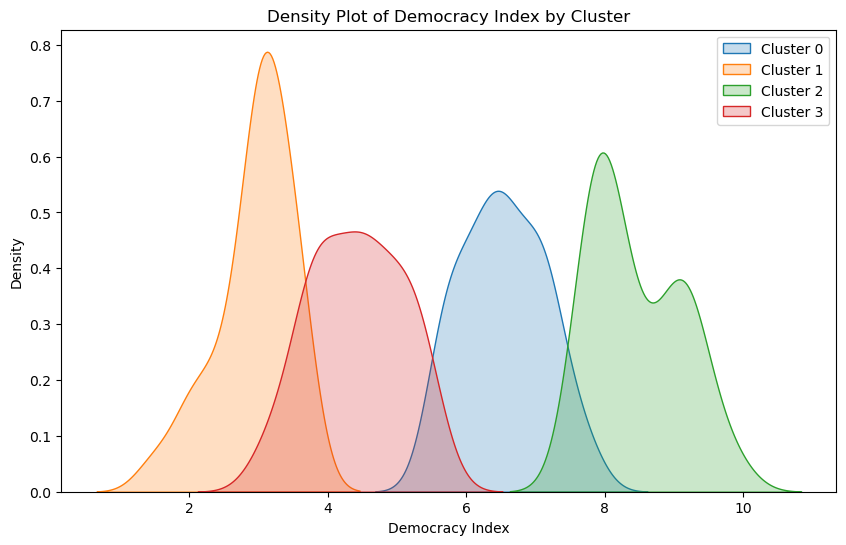

In [103]:
# Plot density for each cluster based on the correct column name ('democracy_index')
plt.figure(figsize=(10, 6))

sns.kdeplot(dataset[dataset['Cluster'] == 0]['democracy_index'], label="Cluster 0", fill=True)
sns.kdeplot(dataset[dataset['Cluster'] == 1]['democracy_index'], label="Cluster 1", fill=True)
sns.kdeplot(dataset[dataset['Cluster'] == 2]['democracy_index'], label="Cluster 2", fill=True)
sns.kdeplot(dataset[dataset['Cluster'] == 3]['democracy_index'], label="Cluster 3", fill=True)

# Customize the plot
plt.xlabel("Democracy Index")
plt.ylabel("Density")
plt.title("Density Plot of Democracy Index by Cluster")
plt.legend()
plt.show()

